In [15]:
import cv2 #to preprocess images(open cv)
import os #to access file directories
import numpy as np # to deal with multidimensional matrices
from random import shuffle 
from tqdm import tqdm
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf 
import tflearn 
from tflearn.layers.conv import conv_2d, max_pool_2d 
from tflearn.layers.core import input_data, dropout, fully_connected 
from tflearn.layers.estimator import regression 

'''Setting up the env'''
LR = 1e-3

In [ ]:
import librosa
import librosa.display 
i = "D:/AAA_video_course/Programming/dataset/Actor_01/03-01-01-01-01-01-01.wav"
x, sr = librosa.load(i)
mel_spect = librosa.feature.melspectrogram(y =x,win_length=512, hop_length=512, window='hann')
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', x_axis='time');
#plt.axis('off')
plt.margins(x=0)

In [16]:
dir_calm= 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\FSER_REIMP_DONE\\out_fser2\\calm\\'              #+boredom
dir_angry= 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\FSER_REIMP_DONE\\out_fser2\\anger\\'        
dir_disgust = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\FSER_REIMP_DONE\\out_fser2\\disgust\\'
dir_anxiety  = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\FSER_REIMP_DONE\\out_fser2\\anxiety\\'      #+fear
dir_happy = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\FSER_REIMP_DONE\\out_fser2\\happiness\\' 
dir_neutral = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\FSER_REIMP_DONE\\out_fser2\\neutral\\'
dir_sad = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\FSER_REIMP_DONE\\out_fser2\\sadness\\'
dir_surprise = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\FSER_REIMP_DONE\\out_fser2\\surprise\\'

In [ ]:
#RAVDESS

import os
import glob
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
for i in glob.glob("E:/ravd/sp/*/*.wav"):
        #کاهش نویز و حذف صدای خالی - کتابخانه ها برای توضیح روش بررسی شود 
        
        x, sr = librosa.load(i)
        #x, index = librosa.effects.trim(x)        #top_db=60      
        mel_spect = librosa.feature.melspectrogram(y =x,win_length=512, hop_length=512, window='hann')
        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
        librosa.display.specshow(mel_spect, y_axis='mel', x_axis='time');
        plt.axis('off')
        plt.margins(x=0)
          
        file_name=os.path.basename(i)
        #part = file_name.split('.')[0]
        part = file_name.split("-")
        if part[2] == '01':
            plt.savefig(dir_neutral+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '02':
            plt.savefig(dir_calm+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '03':
            plt.savefig(dir_happy+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '04':
            plt.savefig(dir_sad+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '05':
            plt.savefig(dir_angry+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '06':
            plt.savefig(dir_anxiety+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '07':
            plt.savefig(dir_disgust+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '08':
            plt.savefig(dir_surprise+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
            

In [ ]:
#emodb
import os
import glob
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
for i in glob.glob("D:/AAA_video_course/Programming/A_main/emodb/wav/*.wav"):

        #کاهش نویز و حذف صدای خالی - کتابخانه ها برای توضیح روش بررسی شود 
        
        x, sr = librosa.load(i)
        #x, index = librosa.effects.trim(x)        #top_db=60      
        mel_spect = librosa.feature.melspectrogram(y =x,win_length=512, hop_length=512, window='hann')
        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
        librosa.display.specshow(mel_spect, y_axis='mel', x_axis='time');
        plt.axis('off')
        plt.margins(x=0)
          
        file_name=os.path.basename(i)
        emotion=file_name[5]
        
        if emotion=='W':
            plt.savefig(dir_angry+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='L':
            plt.savefig(dir_calm+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='E':
            plt.savefig(dir_disgust+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='A':
            plt.savefig(dir_anxiety+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='F':
            plt.savefig(dir_happy+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='T':
            plt.savefig(dir_sad+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='N':
            plt.savefig(dir_neutral+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
            

In [ ]:
#emovo:

import os
import glob
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
for i in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/EMOVO/*/*.wav"):

        #کاهش نویز و حذف صدای خالی - کتابخانه ها برای توضیح روش بررسی شود 
        
        x, sr = librosa.load(i)
        #x, index = librosa.effects.trim(x)        #top_db=60      
        mel_spect = librosa.feature.melspectrogram(y =x,win_length=512, hop_length=512, window='hann')
        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
        librosa.display.specshow(mel_spect, y_axis='mel', x_axis='time');
        plt.axis('off')
        plt.margins(x=0)
          
        file_name=os.path.basename(i)
        emotion=file_name[0:3]
        
        if emotion=='dis':
            plt.savefig(dir_disgust+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='gio':
            plt.savefig(dir_happy+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='pau':
            plt.savefig(dir_anxiety+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='rab':
            plt.savefig(dir_angry+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='sor':
            plt.savefig(dir_surprise+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='tri':
            plt.savefig(dir_sad+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='neu':
            plt.savefig(dir_neutral+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()         

In [ ]:
file_name= 'au06CD.WAV'
emotion=file_name[0:-8]
emotion

In [ ]:
#__savee:

import os
import glob
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
for i in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/SAVEE/AudioData/Actor_*/*.wav"):


        #کاهش نویز و حذف صدای خالی - کتابخانه ها برای توضیح روش بررسی شود 
        
        x, sr = librosa.load(i)
        #x, index = librosa.effects.trim(x)        #top_db=60      
        mel_spect = librosa.feature.melspectrogram(y =x,win_length=512, hop_length=512, window='hann')
        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
        librosa.display.specshow(mel_spect, y_axis='mel', x_axis='time');
        plt.axis('off')
        plt.margins(x=0)
        
        file_name=os.path.basename(i)
        emotion=file_name[0:-8]
        
        if emotion=='a':
            plt.savefig(dir_angry+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='d':
            plt.savefig(dir_disgust+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='f':
            plt.savefig(dir_anxiety+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='h':
            plt.savefig(dir_happy+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='n':
            plt.savefig(dir_neutral+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='sa':
            plt.savefig(dir_sad+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='su':
            plt.savefig(dir_surprise+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()


In [ ]:

import splitfolders
input_folder = "D:/thesis_codes/7_Spectrogram_2DCNN/FSER_REIMP_DONE/out_fser2"


In [ ]:
splitfolders.ratio(input_folder, output="output",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False) 
    

In [17]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from tqdm import tqdm

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [18]:
train_dir = 'D:/thesis_codes/7_Spectrogram_2DCNN/FSER_REIMP_DONE/output/train'
validation_dir = 'D:/thesis_codes/7_Spectrogram_2DCNN/FSER_REIMP_DONE/output/val'

In [19]:
import os
import matplotlib.pyplot as plt
import seaborn as sn

import cv2
from random import randint

import numpy as np

8 classes with 3043 images in total


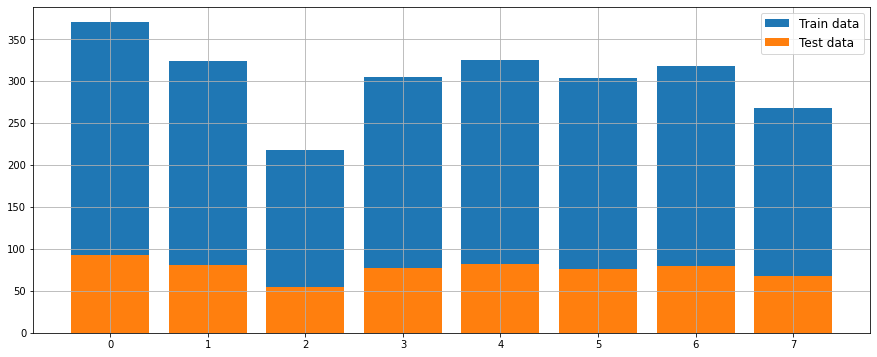

In [20]:
CLASSES, emotions = [], [] # names of classes, count of images for each class

for root, dirs, files in os.walk('D:/thesis_codes/7_Spectrogram_2DCNN/FSER_REIMP_DONE/output'):
    f = os.path.basename(root)    # get class name - Amethyst, Onyx, etc    
        
    if len(files) > 0:
        emotions.append(len(files))
        if f not in CLASSES:
            CLASSES.append(f) # add folder name
    
    # uncomment this block if you want a text output about each subfolder
    #count_dirs = 0
    #for f in dirs:           # count subfolders
        #count_dirs += 1
    #depth = root.split(os.sep)
    #print((len(depth) - 2) * '--'+'>', '{}:\t {} folders, {} imgs'.format(os.path.basename(root), count_dirs, gems[-1] if gems!=[] else 0)) 
    
classes_count = len(CLASSES) # 8 = number of classes
print('{} classes with {} images in total'.format(len(CLASSES), sum(emotions)))

f, ax = plt.subplots(figsize=(15,6))
if(emotions[0])<10:
    plt.bar(range(classes_count), emotions[classes_count:], label = 'Train data')
    plt.bar(range(classes_count), emotions[0:classes_count], label = 'Test data')
else:
    plt.bar(range(classes_count), emotions[0:classes_count], label = 'Train data')
    plt.bar(range(classes_count), emotions[classes_count:], label = 'Test data')
ax.grid()
ax.legend(fontsize = 12);

In [21]:
def read_imgs_lbls(_dir):
    Images, Labels = [], []
    for root, dirs, files in os.walk(_dir):
        f = os.path.basename(root)  # get class name - Amethyst, Onyx, etc       
        for file in files:
            Labels.append(f)
            try:
                image = cv2.imread(root+'/'+file)              # read the image (OpenCV)
                image = cv2.resize(image,(int(128), int(128)))       # resize the image (images are different sizes)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converts an image from BGR color space to RGB
                Images.append(image)
            except Exception as e:
                print(e)
    Images = np.array(Images)
    return (Images, Labels)

In [22]:
def get_class_index(Labels):
    for i, n in enumerate(Labels):
        for j, k in enumerate(CLASSES):    # foreach CLASSES
            if n == k:
                Labels[i] = j
    Labels = np.array(Labels)
    return Labels

In [23]:
Train_Imgs, Train_Lbls = read_imgs_lbls(train_dir)
Train_Lbls = get_class_index(Train_Lbls)
print('Shape of train images: {}'.format(Train_Imgs.shape))
print('Shape of train labels: {}'.format(Train_Lbls.shape))

Shape of train images: (2431, 128, 128, 3)
Shape of train labels: (2431,)


In [24]:
classlist = CLASSES
classlist

['anger',
 'anxiety',
 'calm',
 'disgust',
 'happiness',
 'neutral',
 'sadness',
 'surprise']

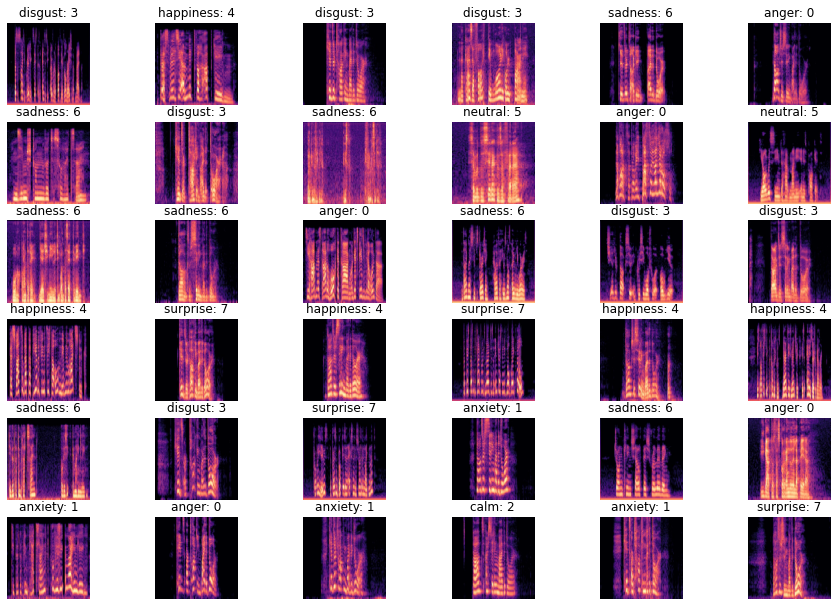

In [25]:
dim = 6
f,ax = plt.subplots(dim,dim) 
f.subplots_adjust(0,0,2,2)
for i in range(0,dim):
    for j in range(0,dim):
        rnd_number = randint(0,len(Train_Imgs))
        cl = Train_Lbls[rnd_number]
        ax[i,j].imshow(Train_Imgs[rnd_number])
        ax[i,j].set_title(CLASSES[cl]+': ' + str(cl))
        ax[i,j].axis('off')

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Train_Imgs, Train_Lbls, shuffle = True, test_size = 0.2, random_state = 42)
print('Shape of X_train: {}, y_train: {} '.format(X_train.shape, y_train.shape))
print('Shape of X_val: {}, y_val: {} '.format(X_val.shape, y_val.shape))

Shape of X_train: (1944, 128, 128, 3), y_train: (1944,) 
Shape of X_val: (487, 128, 128, 3), y_val: (487,) 


In [27]:
filters = 32      # the dimensionality of the output space
kernel_size = 3   # length of the 2D convolution window
max_pool = 2      # size of the max pooling windows

In [28]:
EPOCHS = 500                                 
batch_size = 32                             
iter_per_epoch = len(X_train) // batch_size  
val_per_epoch = len(X_val) // batch_size     

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,GlobalMaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import optimizers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils 
import keras
from keras import optimizers   

In [30]:
model = Sequential()

# first layer
model.add(Conv2D(batch_size, (kernel_size, kernel_size), activation='relu', padding='same', input_shape=(128, 128, 3))) # 32
model.add(MaxPooling2D((max_pool, max_pool))) #reduce the spatial size of incoming features

# second layer
model.add(Conv2D(2*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 64
model.add(MaxPooling2D((max_pool, max_pool))) 

# third layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(MaxPooling2D((max_pool, max_pool))) 

# fourth layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(AveragePooling2D(pool_size= (2, 2), strides= (2, 2))) 

# fifth layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(MaxPooling2D((max_pool, max_pool))) 

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(16*batch_size, activation='relu'))                                             # 512
model.add(Dense(8, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(              # this is the augmentation configuration used for training
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
        )

val_datagen = ImageDataGenerator()                # for val/testing only rescaling function 

In [33]:
batch_size = 32

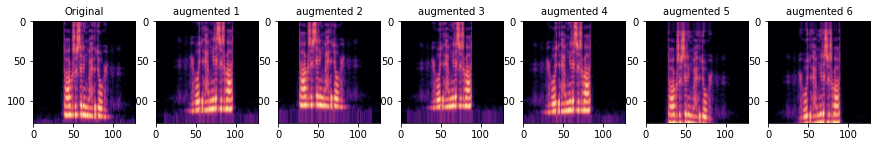

In [34]:
n = randint(0,len(X_train))
samples = np.expand_dims(X_train[n], 0)
it = train_datagen.flow(samples, batch_size=batch_size)
cols = 7

fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(15, 10))
ax[0].imshow(X_train[n], cmap='gray')
ax[0].set_title('Original', fontsize=10)

for i in range(1,cols):
    batch = it.next()    # generate batch of images 
    image = batch[0].astype('uint32') # convert to unsigned int for viewing
    ax[i].set_title('augmented {}'.format(i), fontsize=10)
    ax[i].imshow(image, cmap='gray')

In [35]:
train_gen = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_gen = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [36]:
m = model.fit_generator(
       train_gen,
       steps_per_epoch= iter_per_epoch,
       epochs=500, 
       validation_data = val_gen,
       validation_steps = val_per_epoch,
       verbose = 1 # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
       )

Epoch 1/500
60/60 [==============================] - 8s 91ms/step - batch: 29.5000 - size: 31.8667 - loss: 3.6189 - acc: 0.1444 - val_loss: 2.0771 - val_acc: 0.1042
Epoch 2/500
60/60 [==============================] - 6s 106ms/step - batch: 29.5000 - size: 31.8667 - loss: 2.0175 - acc: 0.2066 - val_loss: 2.0161 - val_acc: 0.1917
Epoch 3/500
60/60 [==============================] - 6s 105ms/step - batch: 29.5000 - size: 31.8667 - loss: 1.9667 - acc: 0.2505 - val_loss: 1.8929 - val_acc: 0.2625
Epoch 4/500
60/60 [==============================] - 6s 104ms/step - batch: 29.5000 - size: 31.8667 - loss: 1.9420 - acc: 0.2458 - val_loss: 1.9339 - val_acc: 0.2292
Epoch 5/500
60/60 [==============================] - 6s 103ms/step - batch: 29.5000 - size: 32.0000 - loss: 1.8903 - acc: 0.2698 - val_loss: 1.8234 - val_acc: 0.2896
Epoch 6/500
60/60 [==============================] - 6s 103ms/step - batch: 29.5000 - size: 31.7333 - loss: 1.8751 - acc: 0.2715 - val_loss: 1.8906 - val_acc: 0.2562
Epoch

60/60 [==============================] - 6s 102ms/step - batch: 29.5000 - size: 31.8667 - loss: 1.1530 - acc: 0.5596 - val_loss: 1.2968 - val_acc: 0.5208
Epoch 51/500
60/60 [==============================] - 6s 102ms/step - batch: 29.5000 - size: 31.8667 - loss: 1.1236 - acc: 0.5811 - val_loss: 1.2956 - val_acc: 0.5354
Epoch 52/500
60/60 [==============================] - 6s 102ms/step - batch: 29.5000 - size: 31.8667 - loss: 1.0785 - acc: 0.6051 - val_loss: 1.4279 - val_acc: 0.5125
Epoch 53/500
60/60 [==============================] - 6s 103ms/step - batch: 29.5000 - size: 31.8667 - loss: 1.1144 - acc: 0.5701 - val_loss: 1.3026 - val_acc: 0.5437
Epoch 54/500
60/60 [==============================] - 6s 103ms/step - batch: 29.5000 - size: 31.8667 - loss: 1.1114 - acc: 0.5879 - val_loss: 1.2525 - val_acc: 0.5604
Epoch 55/500
60/60 [==============================] - 6s 102ms/step - batch: 29.5000 - size: 31.8667 - loss: 1.0515 - acc: 0.5774 - val_loss: 1.4040 - val_acc: 0.5167
Epoch 56/50

60/60 [==============================] - 6s 102ms/step - batch: 29.5000 - size: 32.0000 - loss: 0.6774 - acc: 0.7417 - val_loss: 1.4076 - val_acc: 0.5688
Epoch 100/500
60/60 [==============================] - 6s 102ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.7161 - acc: 0.7343 - val_loss: 1.3618 - val_acc: 0.5625
Epoch 101/500
60/60 [==============================] - 6s 101ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.7023 - acc: 0.7479 - val_loss: 1.4018 - val_acc: 0.5604
Epoch 102/500
60/60 [==============================] - 6s 102ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.7471 - acc: 0.7197 - val_loss: 1.4471 - val_acc: 0.5604
Epoch 103/500
60/60 [==============================] - 6s 101ms/step - batch: 29.5000 - size: 31.7333 - loss: 0.6678 - acc: 0.7595 - val_loss: 1.4828 - val_acc: 0.5583
Epoch 104/500
60/60 [==============================] - 6s 103ms/step - batch: 29.5000 - size: 32.0000 - loss: 0.7461 - acc: 0.7281 - val_loss: 1.3950 - val_acc: 0.5562
Epoch 

Epoch 148/500
60/60 [==============================] - 6s 103ms/step - batch: 29.5000 - size: 32.0000 - loss: 0.4822 - acc: 0.8333 - val_loss: 1.5856 - val_acc: 0.5437
Epoch 149/500
60/60 [==============================] - 6s 101ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.4860 - acc: 0.8337 - val_loss: 1.5610 - val_acc: 0.5813
Epoch 150/500
60/60 [==============================] - 6s 101ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.4054 - acc: 0.8572 - val_loss: 1.6150 - val_acc: 0.6021
Epoch 151/500
60/60 [==============================] - 6s 101ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.5331 - acc: 0.8133 - val_loss: 1.6811 - val_acc: 0.5708
Epoch 152/500
60/60 [==============================] - 6s 101ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.5627 - acc: 0.7986 - val_loss: 1.5438 - val_acc: 0.5604
Epoch 153/500
60/60 [==============================] - 6s 102ms/step - batch: 29.5000 - size: 31.7333 - loss: 0.4866 - acc: 0.8262 - val_loss: 1.5677 - val_acc:

Epoch 197/500
60/60 [==============================] - 6s 101ms/step - batch: 29.5000 - size: 31.7333 - loss: 0.3822 - acc: 0.8634 - val_loss: 1.4289 - val_acc: 0.6354
Epoch 198/500
60/60 [==============================] - 6s 101ms/step - batch: 29.5000 - size: 32.0000 - loss: 0.3556 - acc: 0.8740 - val_loss: 1.6699 - val_acc: 0.6271
Epoch 199/500
60/60 [==============================] - 6s 101ms/step - batch: 29.5000 - size: 31.7333 - loss: 0.4235 - acc: 0.8624 - val_loss: 1.6961 - val_acc: 0.6000
Epoch 200/500
60/60 [==============================] - 6s 103ms/step - batch: 29.5000 - size: 32.0000 - loss: 0.4116 - acc: 0.8589 - val_loss: 1.6586 - val_acc: 0.6062
Epoch 201/500
60/60 [==============================] - 6s 101ms/step - batch: 29.5000 - size: 31.7333 - loss: 0.3916 - acc: 0.8640 - val_loss: 1.6127 - val_acc: 0.5813
Epoch 202/500
60/60 [==============================] - 6s 101ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.4238 - acc: 0.8551 - val_loss: 1.6030 - val_acc:

Epoch 246/500
60/60 [==============================] - 7s 119ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.3873 - acc: 0.8682 - val_loss: 1.5283 - val_acc: 0.6146
Epoch 247/500
60/60 [==============================] - 6s 108ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.2809 - acc: 0.8996 - val_loss: 1.6510 - val_acc: 0.6417
Epoch 248/500
60/60 [==============================] - 6s 104ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.3205 - acc: 0.8860 - val_loss: 1.6218 - val_acc: 0.6208
Epoch 249/500
60/60 [==============================] - 6s 103ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.2748 - acc: 0.9090 - val_loss: 1.7416 - val_acc: 0.6125
Epoch 250/500
60/60 [==============================] - 6s 103ms/step - batch: 29.5000 - size: 32.0000 - loss: 0.2902 - acc: 0.8969 - val_loss: 1.7296 - val_acc: 0.6125
Epoch 251/500
60/60 [==============================] - 6s 101ms/step - batch: 29.5000 - size: 31.7333 - loss: 0.3359 - acc: 0.8866 - val_loss: 1.7702 - val_acc:

Epoch 295/500
60/60 [==============================] - 6s 106ms/step - batch: 29.5000 - size: 31.7333 - loss: 0.3274 - acc: 0.8923 - val_loss: 1.7104 - val_acc: 0.6167
Epoch 296/500
60/60 [==============================] - 6s 109ms/step - batch: 29.5000 - size: 32.0000 - loss: 0.3185 - acc: 0.8984 - val_loss: 1.7953 - val_acc: 0.6208
Epoch 297/500
60/60 [==============================] - 6s 105ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.2842 - acc: 0.9106 - val_loss: 1.6448 - val_acc: 0.6125
Epoch 298/500
60/60 [==============================] - 6s 102ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.3357 - acc: 0.8823 - val_loss: 1.7345 - val_acc: 0.6333
Epoch 299/500
60/60 [==============================] - 6s 101ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.2838 - acc: 0.9038 - val_loss: 1.9187 - val_acc: 0.5938
Epoch 300/500
60/60 [==============================] - 6s 102ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.3027 - acc: 0.8964 - val_loss: 1.8978 - val_acc:

Epoch 344/500
60/60 [==============================] - 6s 103ms/step - batch: 29.5000 - size: 32.0000 - loss: 0.2648 - acc: 0.9104 - val_loss: 1.7289 - val_acc: 0.6146
Epoch 345/500
60/60 [==============================] - 6s 105ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.2870 - acc: 0.9074 - val_loss: 1.8311 - val_acc: 0.5854
Epoch 346/500
60/60 [==============================] - 6s 101ms/step - batch: 29.5000 - size: 31.7333 - loss: 0.3077 - acc: 0.8976 - val_loss: 1.8535 - val_acc: 0.6167
Epoch 347/500
60/60 [==============================] - 6s 102ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.2633 - acc: 0.9090 - val_loss: 2.0316 - val_acc: 0.6271
Epoch 348/500
60/60 [==============================] - 6s 101ms/step - batch: 29.5000 - size: 32.0000 - loss: 0.2588 - acc: 0.9089 - val_loss: 1.8410 - val_acc: 0.6396
Epoch 349/500
60/60 [==============================] - 6s 102ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.2665 - acc: 0.9111 - val_loss: 2.0896 - val_acc:

Epoch 393/500
60/60 [==============================] - 6s 101ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.2748 - acc: 0.9095 - val_loss: 1.9636 - val_acc: 0.6271
Epoch 394/500
60/60 [==============================] - 6s 103ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.2799 - acc: 0.9132 - val_loss: 1.9347 - val_acc: 0.6187
Epoch 395/500
60/60 [==============================] - 6s 102ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.2803 - acc: 0.9100 - val_loss: 1.8757 - val_acc: 0.6187
Epoch 396/500
60/60 [==============================] - 6s 103ms/step - batch: 29.5000 - size: 31.7333 - loss: 0.2824 - acc: 0.9055 - val_loss: 1.7285 - val_acc: 0.6313
Epoch 397/500
60/60 [==============================] - 6s 102ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.2604 - acc: 0.9174 - val_loss: 1.7868 - val_acc: 0.6229
Epoch 398/500
60/60 [==============================] - 6s 103ms/step - batch: 29.5000 - size: 32.0000 - loss: 0.2269 - acc: 0.9271 - val_loss: 1.8205 - val_acc:

Epoch 442/500
60/60 [==============================] - 6s 103ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.2775 - acc: 0.9100 - val_loss: 1.8247 - val_acc: 0.6125
Epoch 443/500
60/60 [==============================] - 6s 103ms/step - batch: 29.5000 - size: 32.0000 - loss: 0.2175 - acc: 0.9307 - val_loss: 2.0817 - val_acc: 0.5917
Epoch 444/500
60/60 [==============================] - 6s 102ms/step - batch: 29.5000 - size: 31.7333 - loss: 0.2773 - acc: 0.9133 - val_loss: 1.9786 - val_acc: 0.6083
Epoch 445/500
60/60 [==============================] - 6s 102ms/step - batch: 29.5000 - size: 32.0000 - loss: 0.2228 - acc: 0.9297 - val_loss: 1.9683 - val_acc: 0.5938
Epoch 446/500
60/60 [==============================] - 6s 103ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.2366 - acc: 0.9189 - val_loss: 2.0892 - val_acc: 0.6125
Epoch 447/500
60/60 [==============================] - 6s 104ms/step - batch: 29.5000 - size: 31.7333 - loss: 0.2025 - acc: 0.9349 - val_loss: 2.0390 - val_acc:

Epoch 491/500
60/60 [==============================] - 6s 106ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.2066 - acc: 0.9294 - val_loss: 2.1408 - val_acc: 0.5833
Epoch 492/500
60/60 [==============================] - 6s 107ms/step - batch: 29.5000 - size: 32.0000 - loss: 0.2731 - acc: 0.9203 - val_loss: 2.1593 - val_acc: 0.5813
Epoch 493/500
60/60 [==============================] - 6s 104ms/step - batch: 29.5000 - size: 31.7333 - loss: 0.2764 - acc: 0.9128 - val_loss: 1.8059 - val_acc: 0.6229
Epoch 494/500
60/60 [==============================] - 6s 105ms/step - batch: 29.5000 - size: 32.0000 - loss: 0.1955 - acc: 0.9339 - val_loss: 2.0454 - val_acc: 0.5896
Epoch 495/500
60/60 [==============================] - 6s 102ms/step - batch: 29.5000 - size: 31.7333 - loss: 0.2189 - acc: 0.9322 - val_loss: 2.0339 - val_acc: 0.6146
Epoch 496/500
60/60 [==============================] - 6s 104ms/step - batch: 29.5000 - size: 31.8667 - loss: 0.2544 - acc: 0.9263 - val_loss: 2.1774 - val_acc:

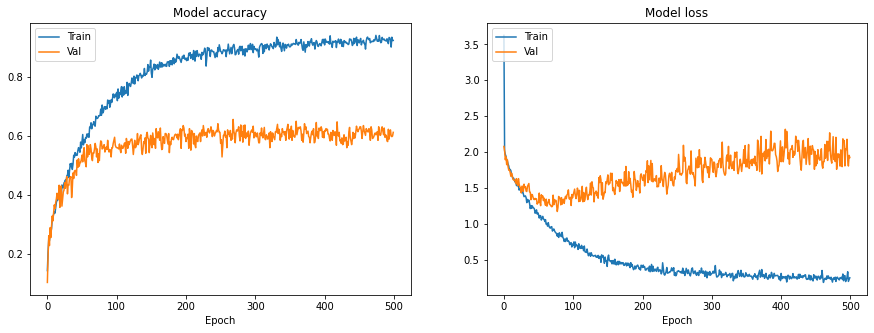

In [39]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(m.history['acc'])
axs[0].plot(m.history['val_acc'])
axs[0].set_title('Model accuracy')
axs[0].legend(['Train', 'Val'], loc='upper left')

axs[1].plot(m.history['loss'])
axs[1].plot(m.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].legend(['Train', 'Val'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

In [40]:
score = model.evaluate_generator(val_gen, steps= len(val_gen))

for idx, metric in enumerate(model.metrics_names):
    print('{}:{}'.format(metric, score[idx]))

loss:1.8824052587151527
acc:0.6139630675315857


In [50]:
y_pre_test

array([6, 6, 7, 0, 5, 5, 3, 6, 0, 6, 0, 7, 0, 4, 3, 1, 1, 7, 2, 0, 3, 1,
       1, 5, 0, 3, 7, 0, 6, 5, 3, 4, 6, 4, 3, 3, 7, 4, 2, 0, 0, 7, 5, 0,
       3, 0, 4, 0, 6, 5, 6, 3, 3, 7, 7, 5, 2, 3, 2, 3, 5, 4, 5, 1, 0, 6,
       7, 3, 5, 3, 5, 3, 3, 5, 3, 1, 4, 0, 3, 6, 4, 3, 5, 1, 0, 1, 3, 0,
       7, 1, 4, 6, 4, 4, 7, 5, 6, 6, 2, 1, 4, 3, 5, 4, 0, 1, 1, 2, 5, 0,
       6, 4, 3, 5, 5, 3, 7, 1, 4, 7, 2, 0, 3, 4, 1, 2, 3, 5, 7, 5, 7, 3,
       6, 6, 2, 3, 2, 2, 3, 6, 4, 7, 1, 0, 5, 3, 0, 6, 6, 5, 5, 4, 5, 5,
       2, 5, 7, 6, 5, 3, 5, 4, 1, 1, 7, 3, 0, 0, 5, 4, 5, 3, 2, 6, 4, 6,
       0, 4, 0, 5, 1, 7, 5, 2, 5, 0, 1, 4, 5, 2, 5, 5, 4, 6, 5, 4, 4, 1,
       4, 3, 0, 5, 2, 3, 3, 1, 3, 0, 6, 7, 0, 0, 7, 0, 0, 4, 7, 2, 5, 0,
       3, 1, 0, 0, 4, 7, 6, 5, 7, 1, 7, 1, 2, 0, 3, 0, 4, 6, 4, 7, 2, 5,
       0, 1, 1, 0, 5, 7, 5, 0, 4, 7, 5, 3, 7, 1, 3, 2, 5, 0, 6, 4, 2, 7,
       4, 6, 4, 7, 3, 0, 1, 5, 2, 6, 0, 3, 3, 6, 4, 1, 5, 3, 6, 6, 0, 0,
       4, 2, 4, 3, 7, 3, 0, 3, 0, 5, 3, 1, 3, 1, 4,

<AxesSubplot:>

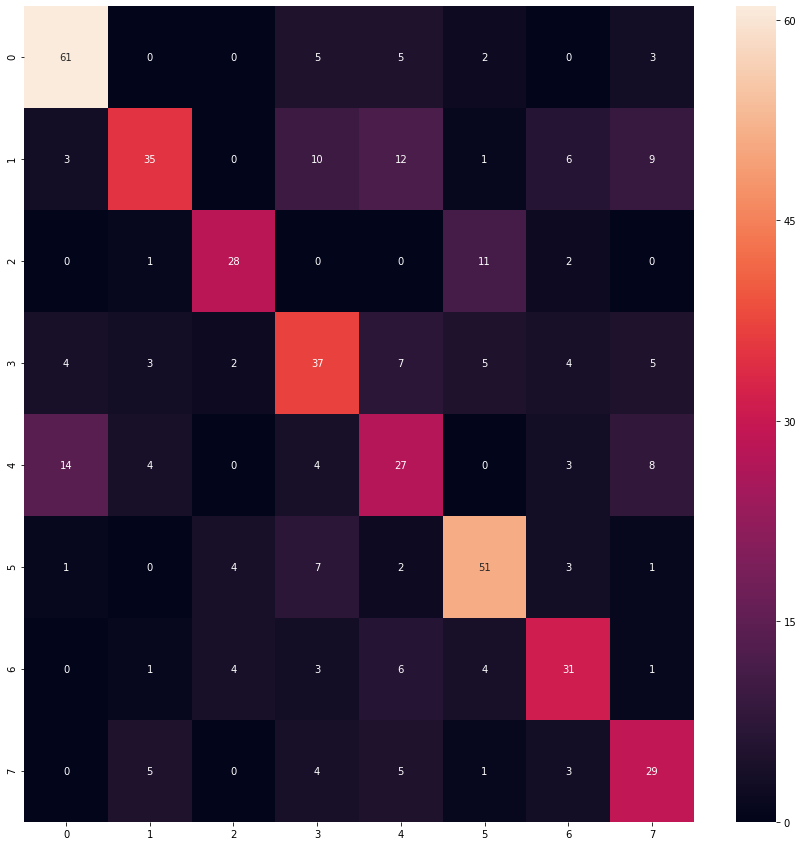

In [41]:
from sklearn.metrics import confusion_matrix
y_pre_test=model.predict(X_val)
y_pre_test=np.argmax(y_pre_test,axis=1)
cm=confusion_matrix(y_val,y_pre_test)

plt.figure(figsize = (15,15))
sn.heatmap(cm, annot=True)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'anger'),
  Text(0, 1.5, 'anxiety'),
  Text(0, 2.5, 'calm'),
  Text(0, 3.5, 'disgust'),
  Text(0, 4.5, 'happiness'),
  Text(0, 5.5, 'neutral'),
  Text(0, 6.5, 'sadness'),
  Text(0, 7.5, 'surprise')])

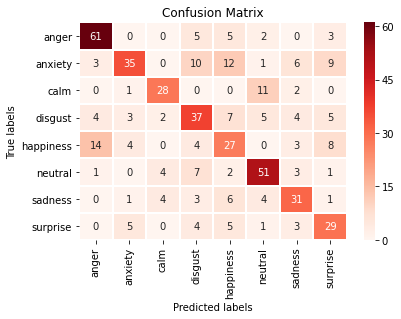

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True,linecolor='white', cmap='Reds', linewidth=2, fmt='', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(classlist); ax.yaxis.set_ticklabels(classlist);
plt.xticks(rotation=90)
plt.yticks(rotation=0)

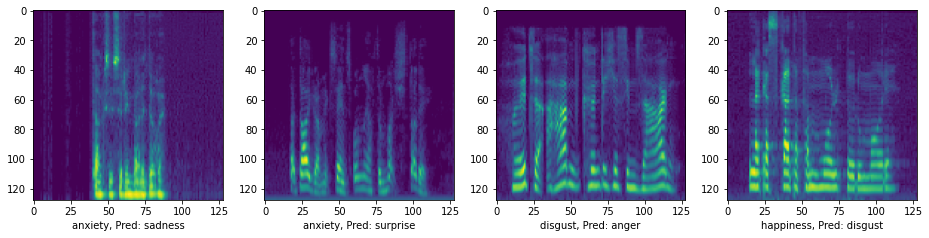

In [43]:
x=(y_pre_test-y_val!=0).tolist()
x=[i for i,l in enumerate(x) if l!=False]

fig,ax=plt.subplots(1,4,sharey=False,figsize=(13,13))
fig.tight_layout()

for i in range(4):
    ax[i].imshow(X_val[x[i]][:,:,1])
    ax[i].set_xlabel('{}, Pred: {}'.format(CLASSES[y_val[x[i]]],CLASSES[y_pre_test[x[i]]]))

In [44]:
model.save('fser_v1_exactcpy.h5')

In [45]:
import sklearn.metrics as  metrics
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix

In [52]:
out = []
for i in range (len(y_pre_test)):
    out.append((y_pre_test[i]))
out  = np.array(out)  
out

array([6, 6, 7, 0, 5, 5, 3, 6, 0, 6, 0, 7, 0, 4, 3, 1, 1, 7, 2, 0, 3, 1,
       1, 5, 0, 3, 7, 0, 6, 5, 3, 4, 6, 4, 3, 3, 7, 4, 2, 0, 0, 7, 5, 0,
       3, 0, 4, 0, 6, 5, 6, 3, 3, 7, 7, 5, 2, 3, 2, 3, 5, 4, 5, 1, 0, 6,
       7, 3, 5, 3, 5, 3, 3, 5, 3, 1, 4, 0, 3, 6, 4, 3, 5, 1, 0, 1, 3, 0,
       7, 1, 4, 6, 4, 4, 7, 5, 6, 6, 2, 1, 4, 3, 5, 4, 0, 1, 1, 2, 5, 0,
       6, 4, 3, 5, 5, 3, 7, 1, 4, 7, 2, 0, 3, 4, 1, 2, 3, 5, 7, 5, 7, 3,
       6, 6, 2, 3, 2, 2, 3, 6, 4, 7, 1, 0, 5, 3, 0, 6, 6, 5, 5, 4, 5, 5,
       2, 5, 7, 6, 5, 3, 5, 4, 1, 1, 7, 3, 0, 0, 5, 4, 5, 3, 2, 6, 4, 6,
       0, 4, 0, 5, 1, 7, 5, 2, 5, 0, 1, 4, 5, 2, 5, 5, 4, 6, 5, 4, 4, 1,
       4, 3, 0, 5, 2, 3, 3, 1, 3, 0, 6, 7, 0, 0, 7, 0, 0, 4, 7, 2, 5, 0,
       3, 1, 0, 0, 4, 7, 6, 5, 7, 1, 7, 1, 2, 0, 3, 0, 4, 6, 4, 7, 2, 5,
       0, 1, 1, 0, 5, 7, 5, 0, 4, 7, 5, 3, 7, 1, 3, 2, 5, 0, 6, 4, 2, 7,
       4, 6, 4, 7, 3, 0, 1, 5, 2, 6, 0, 3, 3, 6, 4, 1, 5, 3, 6, 6, 0, 0,
       4, 2, 4, 3, 7, 3, 0, 3, 0, 5, 3, 1, 3, 1, 4,

In [53]:
y_pred = model.predict(X_val)
report=metrics.classification_report(y_val,out) 
print(report)
#print(accuracy_score(y_true=Y,y_pred=y_predict))
#print(confusion_matrix(y_test, y_pred) )
matrix = metrics.confusion_matrix(y_val , out)
print(matrix)
metrics.accuracy_score(y_val,out)*100 

              precision    recall  f1-score   support

           0       0.73      0.80      0.77        76
           1       0.71      0.46      0.56        76
           2       0.74      0.67      0.70        42
           3       0.53      0.55      0.54        67
           4       0.42      0.45      0.44        60
           5       0.68      0.74      0.71        69
           6       0.60      0.62      0.61        50
           7       0.52      0.62      0.56        47

    accuracy                           0.61       487
   macro avg       0.62      0.61      0.61       487
weighted avg       0.62      0.61      0.61       487

[[61  0  0  5  5  2  0  3]
 [ 3 35  0 10 12  1  6  9]
 [ 0  1 28  0  0 11  2  0]
 [ 4  3  2 37  7  5  4  5]
 [14  4  0  4 27  0  3  8]
 [ 1  0  4  7  2 51  3  1]
 [ 0  1  4  3  6  4 31  1]
 [ 0  5  0  4  5  1  3 29]]


61.39630390143738

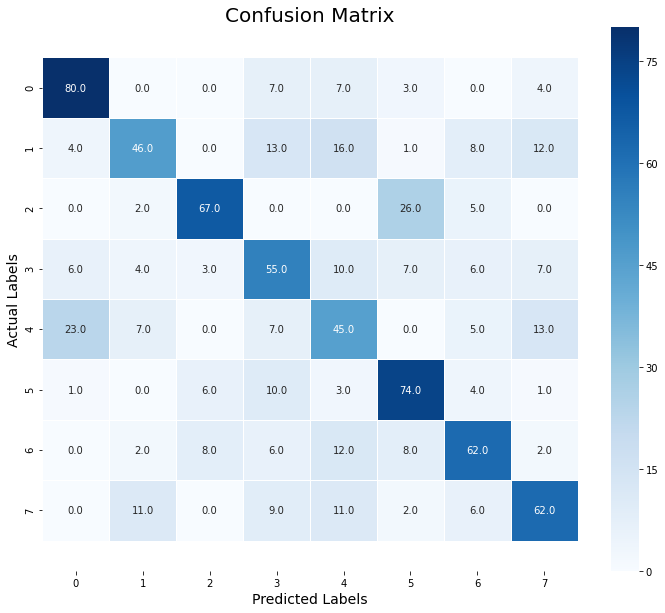

In [54]:
cm = confusion_matrix(y_val, out,normalize='true')
plt.figure(figsize = (12, 10))
#conf_matrix= pd.DataFrame(cm,columns=None)
#conf_matrix.to_csv(r'E:\confusion_matrix.csv', index = False, header=False)
ax = sns.heatmap(np.round(cm*100), linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()